# 2A-L5 Edge detection: Gradients

## Gradient Direction

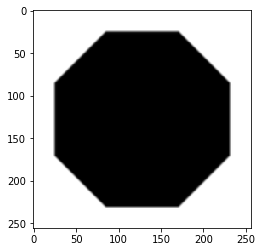

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('./images/octagon.png', cv2.IMREAD_GRAYSCALE) / 255
plt.imshow(img, cmap='gray');

### Compute x, y gradients

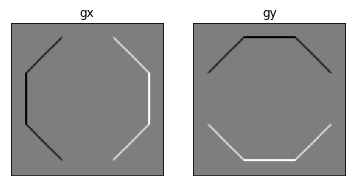

In [2]:
gx = cv2.Sobel(img, -1, dx=1, dy=0)
gy = cv2.Sobel(img, -1, dx=0, dy=1)

plt.subplot(1, 2, 1)
plt.imshow(gx, cmap='gray')
plt.title('gx'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(gy, cmap='gray')
plt.title('gy'), plt.xticks([]), plt.yticks([]);

### Obtain gradient magnitude and direction

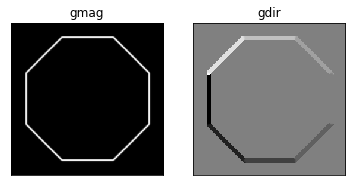

In [3]:
gmag = np.sqrt(gx**2 + gy**2)
gdir = np.arctan2(-gy, gx) * 180 / np.pi

plt.subplot(1, 2, 1)
plt.imshow(gmag / (4 * np.sqrt(2)), cmap='gray')
plt.title('gmag'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(gdir, cmap='gray')
plt.title('gdir'), plt.xticks([]), plt.yticks([]);

### Find pixels with desired gradient direction

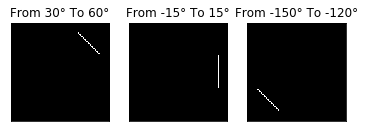

In [4]:
def select_gdir(gmag, gdir, mag_min, angle_low, angle_high):
    result = gmag >= mag_min
    result &= gdir >= angle_low 
    result &= gdir <= angle_high
    return result.astype(np.float)

plt.subplot(1, 3, 1)
plt.imshow(select_gdir(gmag, gdir, 1, 30, 60), cmap='gray')
plt.title('From 30° To 60°'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(select_gdir(gmag, gdir, 1, -15, 15), cmap='gray')
plt.title('From -15° To 15°'), plt.xticks([]), plt.yticks([]);
plt.subplot(1, 3, 3)
plt.imshow(select_gdir(gmag, gdir, 1, -150, -120), cmap='gray')
plt.title('From -150° To -120°'), plt.xticks([]), plt.yticks([]);